## Wind field cases

TODO after holidays:

- I feel like the storms are going to the left of the page, so for now my 2 vectors and 1 mark are wrong.
- Plot the motion vector so that the TC is going to the top of the page.
- Change Mawar to another case. Indeed, for Mawar there is the rain impact which questions the maximum location estimate. 
 
1) Intro plots (note the motion/shear vectors describe how much the storm/shear moved forward during 1 hour)

2) KXX_PRM wind field inferences

3) Same for FIT and wIA (Appendix)

4) HY2 wind field estimates

5) Wind profile and inflow angle profile estimates in both models and observations

----
List of interesting cases

Larry (al122021) on 09-07 at 2148 UTC ==> Regular w.r.t motion/shear, nice SAR, nice SCT, nice BL FIT, I > V/r; but maybe a little bit weak. 

Nigel (al152023) on 09-19 at 0931 UTC ==> Regular w.r.t motion/shear, nice SAR, nice SCT, nice BL FIT, I > V/r; but maybe a little bit weak. 

Lee (al132023) on 09-09 at 0950 UTC ==> Regular w.r.t motion/shear, nice SAR, nice SCT, nice BL FIT, I > V/r; moderate (stronger than Larry and Nigel, and small Rmax, so good case). 

Lee (al132023) on 09-10 at 2213 UTC ==> Regular w.r.t motion/shear, nice SAR, nice SCT, nice BL FIT, I > V/r; moderate (stronger than Larry and Nigel, and small Rmax, so good case). 

Gilma (ep072024) on 08-23 at 1416 UTC ==> Irregular w.r.t motion/shear, nice SAR, nice SCT, nice BL FIT, I > V/r; weak. 

Milton (al142024) on 10-07 at 0022 UTC ==> Irregular w.r.t motion/shear, nice SAR, nice SCT, nice BL FIT, I > V/r; weak. 

Koinu (wp142023) on 10-03 at 0945 UTC ==> Irregular w.r.t motion/shear, nice SAR, nice SCT, nice BL FIT, I > V/r; weak but still Vmax ~ 45 m/s, big eye though.

Chanthu (wp192021) on 09-08 at 2115 UTC ==> Not on the asymmetry plot (too smooth?), nice SAR, nice SCT, nice BL FIT, I < V/r but ok; intense!

Freddy (sh112023) on 02-16 at 0012 UTC ==> Not on the asymmetry plot (because it is Southern hemisphere!) but would be an interesting case, nice SAR, nice SCT, nice BL FIT, I < V/r but ok; intense! Also nice case on 02-18 at 1400 UTC.

Bolaven (wp152023) on 10-11 at 0840 UTC ==> Regular w.r.t motion/shear, nice SAR, nice SCT, moderatly nice BL FIT, I > V/r; intense!

Mawar (wp022023) on 05-26 at 0855 UTC ==> Regular w.r.t motion/shear, nice SAR, nice SCT, nice BL FIT, I > V/r; intense!

Dora (ep052023) on 08-09 at 0501 UTC ==> Regular w.r.t motion/shear, nice SAR, nice SCT, nice BL FIT, I < V/r but ok; intense! Very nice case despite the I < V/r!!!

Kirk also has nice cases in the range Vmax~50 m/s.

In [1]:
# General
import glob
import re
import os.path
# import warnings
# warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import copy

# Arrays & Displays
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import pandas as pd

# Data treatment
from datetime import datetime
from scipy.optimize import curve_fit
from scipy.interpolate import griddata
from scipy.optimize import minimize
from scipy.ndimage import gaussian_filter

# Default parameters
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

In [75]:
# Paths & Params
PTHS = {
    'dsg_pth':     '/home/arthur/data/tropical_cyclones/SAR/parametric_dataset/dsg.nc',
    'sar_dir':     '/home/arthur/data/tropical_cyclones/SAR/S1_RS2_RCM/sar_files/',
    'sav_dir':     '/home/arthur/results/TCsLifeMonitFromObs/winddirection/PRJCT_TCBL/04_WIND_FIELD_CASES/',
    'sct_dir':     '/home/arthur/data/tropical_cyclones/scatterometer/hy-2/',
    'dsa_pth':     '/home/arthur/results/TCsLifeMonitFromObs/winddirection/PRJCT_TCBL/02_ASYMM_SHEAR_MOTION/dsa.nc',
    # 'K01_PRM_dir': '/home/arthur/results/TCsLifeMonitFromObs/winddirection/PRJCT_TCBL/00_LP_KPP_K01/cases/',
    'K01_PRM_dir': '/home/arthur/results/TCsLifeMonitFromObs/winddirection/PRJCT_TCBL/00_LP_KPP_K01/new/cases/', ### OLD
    'K01_FIT_dir': '/home/arthur/results/TCsLifeMonitFromObs/winddirection/PRJCT_TCBL/00_FIT_K01/cases/',
    'K01_wIA_dir': '/home/arthur/results/TCsLifeMonitFromObs/winddirection/PRJCT_TCBL/00_FIT_K01_wINFLOW_ANGLE/cases/',
    'K25_PRM_dir': '/home/arthur/results/TCsLifeMonitFromObs/winddirection/PRJCT_TCBL/00_LP_KPP_K25_C1C2FIT/cases/',
    'K25_FIT_dir': '/home/arthur/results/TCsLifeMonitFromObs/winddirection/PRJCT_TCBL/00_FIT_K25/cases/',
    'K25_wIA_dir': '/home/arthur/results/TCsLifeMonitFromObs/winddirection/PRJCT_TCBL/00_FIT_K25_wINFLOW_ANGLE/cases/',
}

# Open data
dsg = xr.open_dataset(PTHS['dsg_pth'])

In [3]:
# ### OLD

# # FILTERS
# cond = (
#     (dsg.center_quality_flag < 2) & 
#     (dsg.percent_outside < 50) & 
#     (dsg.percent_rmx_inside == 1) &
#     (abs(dsg.lat) < 30) & 
#     (dsg.rmx < 100000) & 
#     (dsg.vmx > 20)
# )
# dsg_filtered    = dsg.where(cond, drop=True)
# print(len(dsg_filtered.time))

In [4]:
# FILTERS
cond = (
    # (dsg.lat > 0) &             # Northern hemisphere; Remove this filter?
    (dsg.dist2coast  > dsg.r34) & # Distance to coast
    (dsg.percent_outside < 10)  & # Sufficient SAR coverage
    (dsg.vmx > 20)    
)
dsg_filtered    = dsg.where(cond, drop=True)
print(len(dsg_filtered.time))

591


In [6]:
def coriolis(lat):
    '''Latitude must be in degrees.'''
    Omega = 7.2921e-5                             # Earth rotation vector
    fcor  = 2 * Omega * np.sin(lat * np.pi / 180) # Coriolis parameter assuming it's constant 
    return fcor

def holland_profile(r, lat, B, Vmin, Rmax, Vmax):
    '''We assume that rho is constant and equals 1.15 kg.m-3'''
    fcor   = abs(coriolis(lat))
    rho    = 1.15
    r      = r.astype(float) + 0.001           # To avoid dividing by zero
    r_star = (Rmax / r) ** B
    V      = r * 0.
    V      = Vmin + np.sqrt( ((Vmax - Vmin) ** 2) * r_star * np.exp(1 - r_star) + (r * fcor / 2) ** 2) - (r * fcor / 2)
    return V

#########################
###       PLOT        ###
#########################
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def getColorMap(rgbFile="medspiration.rgb"):
    '''
    Load a RGB palette provided in ascii file
    '''
    colors = []
    nbCol  =0
    for line in open( rgbFile ):
        r,g,b = [int(c) for c in line.split()]
        colors.append( [r/255.,g/255.,b/255.] )
        nbCol += 1
    return(mpl.colors.ListedColormap(colors, name="custom", N=nbCol))

palette      = '/home/arthur/scripts/tools/high_wind_speed.pal'
cwnd         = getColorMap(rgbFile=palette)
normalizer   = Normalize(0, 80)

In [32]:
### Create ref. grid, choose resolution
dim_ref      = np.linspace(-500, 500, int((500 // 1 * 2) + 1)) * 1000
x_ref, y_ref = np.meshgrid(dim_ref, dim_ref)

def pol2cart(r, th):
    x = r * np.cos(th)
    y = r * np.sin(th)
    return x, y

def get_cartesian_wind_from(dss):
    dr, th       = np.meshgrid(dss.rad, dss.theta)
    th           = th + float(dss.rotation_angle) + 90
    th           = np.deg2rad(th % 360)
    ds_x, ds_y   = pol2cart(dr, th)
    ws_car       = griddata((ds_x.flatten(), ds_y.flatten()), np.array(dss.wind_speed.transpose()).flatten(), (x_ref, y_ref), method='nearest')
    return ws_car

In [ ]:
### Open asymmetry information
dsasymmetry = xr.open_dataset(PTHS['dsa_pth'])

# Compute phase of max. asymmetry
l_phs_max = []
for t in tqdm(range(len(dsasymmetry.time))):
    l_phs_max.append(float(dsasymmetry.isel(time=t).phs[dsasymmetry.isel(time=t).rad >= 1].isel(rad=dsasymmetry.isel(time=t).acn[dsasymmetry.isel(time=t).rad >= 1].argmax())))
dsasymmetry['phs_max'] = xr.DataArray(l_phs_max, coords={'time': dsasymmetry.time})

### 1) Intro plots

In [139]:
# Open files
caseA = dsg_filtered.where(dsg_filtered.name == 'MAWAR', drop=True).isel(time=4)
fileA = caseA.file_tcva.item()
dsa   = xr.open_dataset(PTHS['sar_dir'] + fileA).isel(time=0)
caseB = dsg_filtered.where(dsg_filtered.name == 'KOINU', drop=True).isel(time=1)
fileB = caseB.file_tcva.item()
dsb   = xr.open_dataset(PTHS['sar_dir'] + fileB).isel(time=0)

In [151]:
# Aimuthal Location of Max. Wind rel. to Motion (x-axis of synthetic figure)
pma             = dsasymmetry.where(dsasymmetry.file_tcva == fileA, drop=True).isel(time=0).phs_max
pmb             = dsasymmetry.where(dsasymmetry.file_tcva == fileB, drop=True).isel(time=0).phs_max
MaxLocRel2MotA  = xr.where(np.rad2deg(pma) < 180, np.rad2deg(pma), np.rad2deg(pma) - 360)
MaxLocRel2MotB  = xr.where(np.rad2deg(pmb) < 180, np.rad2deg(pmb), np.rad2deg(pmb) - 360)
xma, yma        = pol2cart(caseA.rmx, np.deg2rad(MaxLocRel2MotA))
xmb, ymb        = pol2cart(caseB.rmx, np.deg2rad(MaxLocRel2MotB))
# Shear Direction rel. to Motion (y-axis of synthetic figure)
relShrDir_caseA = (caseA.wsd_pmd - caseA.storm_dir_ibt) % 360
ShrDirRel2MotA  = xr.where(relShrDir_caseA < 180, relShrDir_caseA, relShrDir_caseA - 360)
relShrDir_caseB = (caseB.wsd_pmd - caseB.storm_dir_ibt) % 360
ShrDirRel2MotB  = xr.where(relShrDir_caseB < 180, relShrDir_caseB, relShrDir_caseB - 360)
xsa, ysa        = pol2cart(caseA.vws_pmd * 3600, np.deg2rad(ShrDirRel2MotA))
xsb, ysb        = pol2cart(caseB.vws_pmd * 3600, np.deg2rad(ShrDirRel2MotB))

In [152]:
# Convert to cartesian
wsca = get_cartesian_wind_from(dsa)
wscb = get_cartesian_wind_from(dsb)

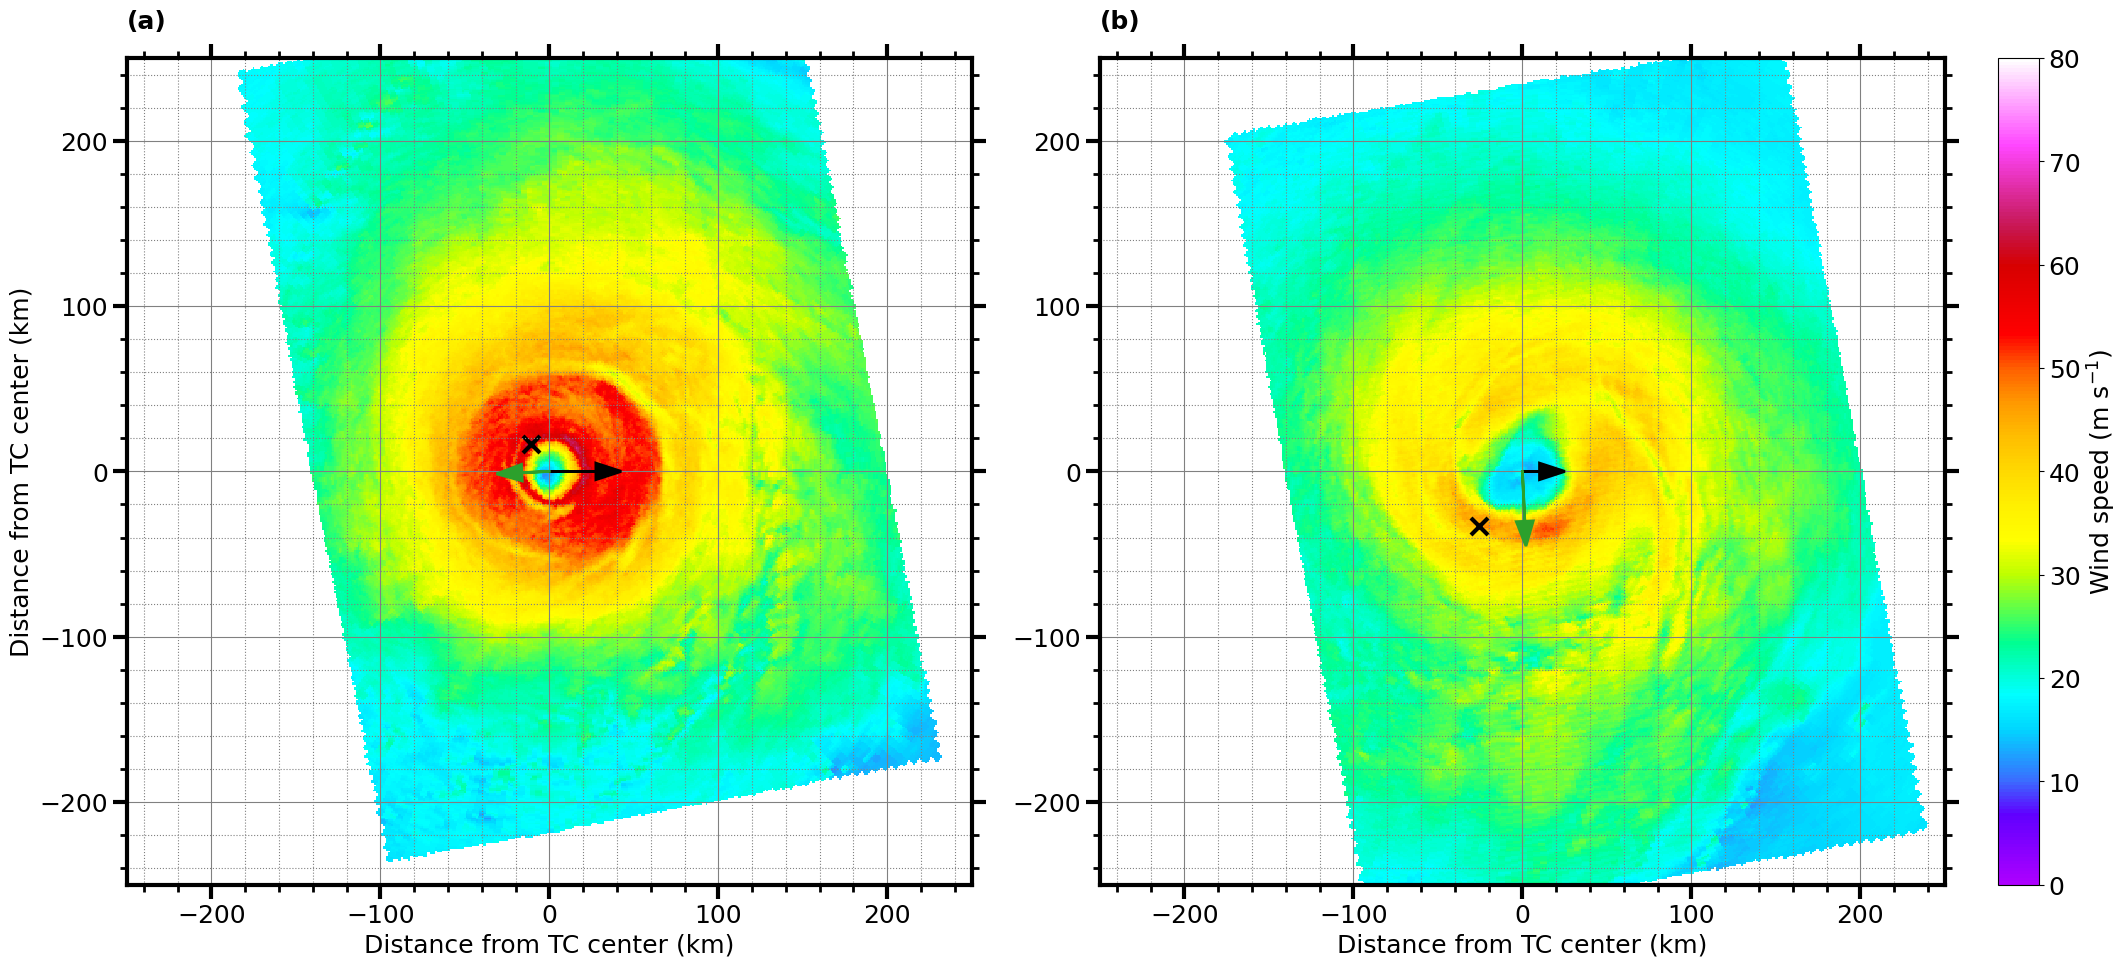

In [155]:
# Create figure with subplots
fig = plt.figure(figsize=(22, 10))
gs  = GridSpec(1, 2, width_ratios=[1, 1.25])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax_lims2D  = 250

#####################
### K01 PRM SPEED ###
#####################
ax1.text(0.0, 1.03, '(a)', transform=ax1.transAxes, fontsize=18, fontweight='bold', verticalalignment='bottom', horizontalalignment='left')

# SAR wind speeds
im1     = ax1.pcolormesh(x_ref / 1000, y_ref / 1000, wsca, cmap=cwnd, norm=normalizer)

# Motion vector
ax1.arrow(
    0,                                # x_start: 150 km
    0,                                # y_start: 200 km
    float(caseA.speed * 3600 / 1000), # dx: 50 km (points right)
    0,                                # dy: 0 km (horizontal)
    head_width=10,                    # Width of the arrow head
    head_length=15,                   # Length of the arrow head
    fc='k',                           # Face color
    ec='k',                           # Edge color
    linewidth=2,
    zorder=10                         # Ensure it plots over the pcolormesh
)    
# Shear direction
ax1.arrow(
    0,                      # x_start: 150 km
    0,                      # y_start: 200 km
    float(xsa) / 1000, # dx: 50 km (points right)
    float(ysa) / 1000,                      # dy: 0 km (horizontal)
    head_width=10,          # Width of the arrow head
    head_length=15,         # Length of the arrow head
    fc='tab:green',                 # Face color
    ec='tab:green',                 # Edge color
    linewidth=2,
    zorder=10               # Ensure it plots over the pcolormesh
) 
# Maximum Azim. Location
ax1.scatter(xma / 1000, yma / 1000, marker='x', s=150, c='k', linewidth=3)

ax1.set_xlim(-ax_lims2D, ax_lims2D);ax1.set_ylim(-ax_lims2D, ax_lims2D)
ax1.set_xlabel('Distance from TC center (km)')
ax1.set_ylabel('Distance from TC center (km)')

ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', color='gray')
ax1.grid(which='minor', linestyle=':', color='gray')
for spine in ax1.spines.values():
    spine.set_linewidth(3)
    spine.set_edgecolor('black')
ax1.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(True)
ax1.tick_params(which='major', width=3, length=10, top=True, right=True)
ax1.tick_params(which='minor', width=2, length=5, top=True, right=True)

#####################
### K25 PRM SPEED ###
#####################
ax2.text(0.0, 1.03, '(b)', transform=ax2.transAxes, fontsize=18, fontweight='bold', verticalalignment='bottom', horizontalalignment='left')

# SAR wind speeds
im2     = ax2.pcolormesh(x_ref / 1000, y_ref / 1000, wscb, cmap=cwnd, norm=normalizer)

# Motion vector
ax2.arrow(
    0,                                # x_start: 150 km
    0,                                # y_start: 200 km
    float(caseB.speed * 3600 / 1000), # dx: 50 km (points right)
    0,                                # dy: 0 km (horizontal)
    head_width=10,                    # Width of the arrow head
    head_length=15,                   # Length of the arrow head
    fc='k',                           # Face color
    ec='k',                           # Edge color
    linewidth=2,
    zorder=10                         # Ensure it plots over the pcolormesh
)   
# Shear direction
ax2.arrow(
    0,                      # x_start: 150 km
    0,                      # y_start: 200 km
    float(xsb) / 1000, # dx: 50 km (points right)
    float(ysb) / 1000,                      # dy: 0 km (horizontal)
    head_width=10,          # Width of the arrow head
    head_length=15,         # Length of the arrow head
    fc='tab:green',                 # Face color
    ec='tab:green',                 # Edge color
    linewidth=2,
    zorder=10               # Ensure it plots over the pcolormesh
) 
# Maximum Azim. Location
ax2.scatter(xmb / 1000, ymb / 1000, marker='x', s=150, c='k', linewidth=3)

ax2.set_xlim(-ax_lims2D, ax_lims2D);ax2.set_ylim(-ax_lims2D, ax_lims2D)
ax2.set_xlabel('Distance from TC center (km)')

cbar = plt.colorbar(im1, ax=ax2)
cbar.set_label(r'Wind speed (m s$^{-1}$)')

ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', color='gray')
ax2.grid(which='minor', linestyle=':', color='gray')
for spine in ax2.spines.values():
    spine.set_linewidth(3)
    spine.set_edgecolor('black')
ax2.spines['right'].set_visible(True)
ax2.spines['top'].set_visible(True)
ax2.tick_params(which='major', width=3, length=10, top=True, right=True)
ax2.tick_params(which='minor', width=2, length=5, top=True, right=True)

# Final adjustments
plt.tight_layout()

# # Save
# plt.savefig(PTHS['sav_dir'] + 'Intro_cases.png', bbox_inches='tight')